In [1]:
#The setup 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import the csv file 

import pandas as pd 
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file = open('MergeConflictsDataset.csv')
data = pd.read_csv(file)


In [3]:
data.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [4]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [5]:

data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
import subprocess
le = LabelEncoder()

data_encode = data[['commit', 'parent1', 'parent2', 'ancestor']]
data_encoded = data_encode.apply(le.fit_transform)
data[['commit', 'parent1', 'parent2', 'ancestor']] = data_encoded
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25221,26009,9902,18220,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4287,11977,26298,11674,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24373,5702,19615,3955,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1272,6900,14041,18408,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7015,12524,9848,2603,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,20783,9786,22545,6839,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,14880,16800,7497,17034,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,17175,8845,23199,6136,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,23403,8845,24118,6136,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [7]:
data.drop_duplicates
#data = data.drop(columns=['commit' , 'parent1', 'parent2', 'ancestor' ], axis = 1)


<bound method DataFrame.drop_duplicates of        commit  parent1  parent2  ancestor  is pr  added lines  deleted lines  \
0       25221    26009     9902     18220      1            5              0   
1        4287    11977    26298     11674      0         1166          11267   
2       24373     5702    19615      3955      1            0              0   
3        1272     6900    14041     18408      1            0              0   
4        7015    12524     9848      2603      0            0              0   
...       ...      ...      ...       ...    ...          ...            ...   
26983   20783     9786    22545      6839      1           66              0   
26984   14880    16800     7497     17034      1            1              1   
26985   17175     8845    23199      6136      1            1              1   
26986   23403     8845    24118      6136      1            1              1   
26987    9002     6827    18454      4733      1            1              1 

In [8]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25221,26009,9902,18220,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4287,11977,26298,11674,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24373,5702,19615,3955,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1272,6900,14041,18408,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7015,12524,9848,2603,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [9]:

data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25221,26009,9902,18220,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4287,11977,26298,11674,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24373,5702,19615,3955,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1272,6900,14041,18408,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7015,12524,9848,2603,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,20783,9786,22545,6839,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,14880,16800,7497,17034,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,17175,8845,23199,6136,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,23403,8845,24118,6136,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26988 non-null  int64  
 1   parent1          26988 non-null  int64  
 2   parent2          26988 non-null  int64  
 3   ancestor         26988 non-null  int64  
 4   is pr            26988 non-null  int64  
 5   added lines      26988 non-null  int64  
 6   deleted lines    26988 non-null  int64  
 7   devs parent1     26988 non-null  int64  
 8   devs parent2     26988 non-null  int64  
 9   time             26988 non-null  int64  
 10  nr files         26988 non-null  int64  
 11  added files      26988 non-null  int64  
 12  deleted files    26988 non-null  int64  
 13  renamed files    26988 non-null  int64  
 14  copied files     26988 non-null  int64  
 15  modified files   26988 non-null  int64  
 16  nr commits1      26988 non-null  int64  
 17  nr commits2 

In [11]:
data.shape

(26988, 37)

In [12]:
data.dropna()
corrMatrix = data.corr()
corrMatrix

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
commit,1.000000,0.002714,-0.012129,0.001475,0.001822,-0.003521,-0.010365,-0.013720,0.001253,-0.007837,...,-0.005757,-0.000657,-0.011144,-0.012486,-0.002453,-0.008523,-0.014034,-0.014476,-0.013687,0.001103
parent1,0.002714,1.000000,-0.000823,0.377584,0.000400,-0.001022,-0.006636,-0.008770,-0.007735,-0.009873,...,-0.005462,-0.006489,-0.012436,-0.013783,-0.010126,-0.001827,-0.003660,-0.001468,-0.000083,0.001979
parent2,-0.012129,-0.000823,1.000000,0.006608,0.000909,-0.001890,-0.004812,0.001014,-0.006051,0.002660,...,-0.000593,0.003012,0.000877,-0.001411,0.003006,0.011291,0.009090,0.012976,0.012615,0.006512
ancestor,0.001475,0.377584,0.006608,1.000000,0.013591,-0.000774,-0.005365,0.006583,0.008438,0.025270,...,0.008028,0.014116,-0.001420,0.004366,0.000523,-0.007381,-0.006957,-0.003251,-0.002504,0.007983
is pr,0.001822,0.000400,0.000909,0.013591,1.000000,-0.031623,-0.022815,-0.044585,-0.203300,-0.064534,...,-0.150747,-0.133737,-0.121954,-0.052816,-0.031528,0.048297,-0.165440,-0.082845,-0.068044,-0.437140
added lines,-0.003521,-0.001022,-0.001890,-0.000774,-0.031623,1.000000,0.072799,-0.011097,0.153787,0.055161,...,0.045570,0.042263,0.038752,0.044621,0.027754,-0.029336,0.011743,-0.013374,-0.015554,0.040139
deleted lines,-0.010365,-0.006636,-0.004812,-0.005365,-0.022815,0.072799,1.000000,-0.006633,0.042103,0.012469,...,0.011024,0.022982,0.010514,0.004975,0.024960,-0.018688,0.006083,-0.007584,-0.009013,0.036805
devs parent1,-0.013720,-0.008770,0.001014,0.006583,-0.044585,-0.011097,-0.006633,1.000000,-0.017708,0.364631,...,0.770080,0.689897,0.672887,0.288206,0.360899,0.016961,0.455703,0.201510,0.191168,0.073800
devs parent2,0.001253,-0.007735,-0.006051,0.008438,-0.203300,0.153787,0.042103,-0.017708,1.000000,0.364844,...,0.404017,0.409193,0.147093,0.118041,0.146640,-0.071237,0.080678,-0.001229,-0.006928,0.274533
time,-0.007837,-0.009873,0.002660,0.025270,-0.064534,0.055161,0.012469,0.364631,0.364844,1.000000,...,0.454067,0.499484,0.187614,0.172282,0.123698,-0.060343,0.121139,0.020869,0.016876,0.135982


<AxesSubplot:>

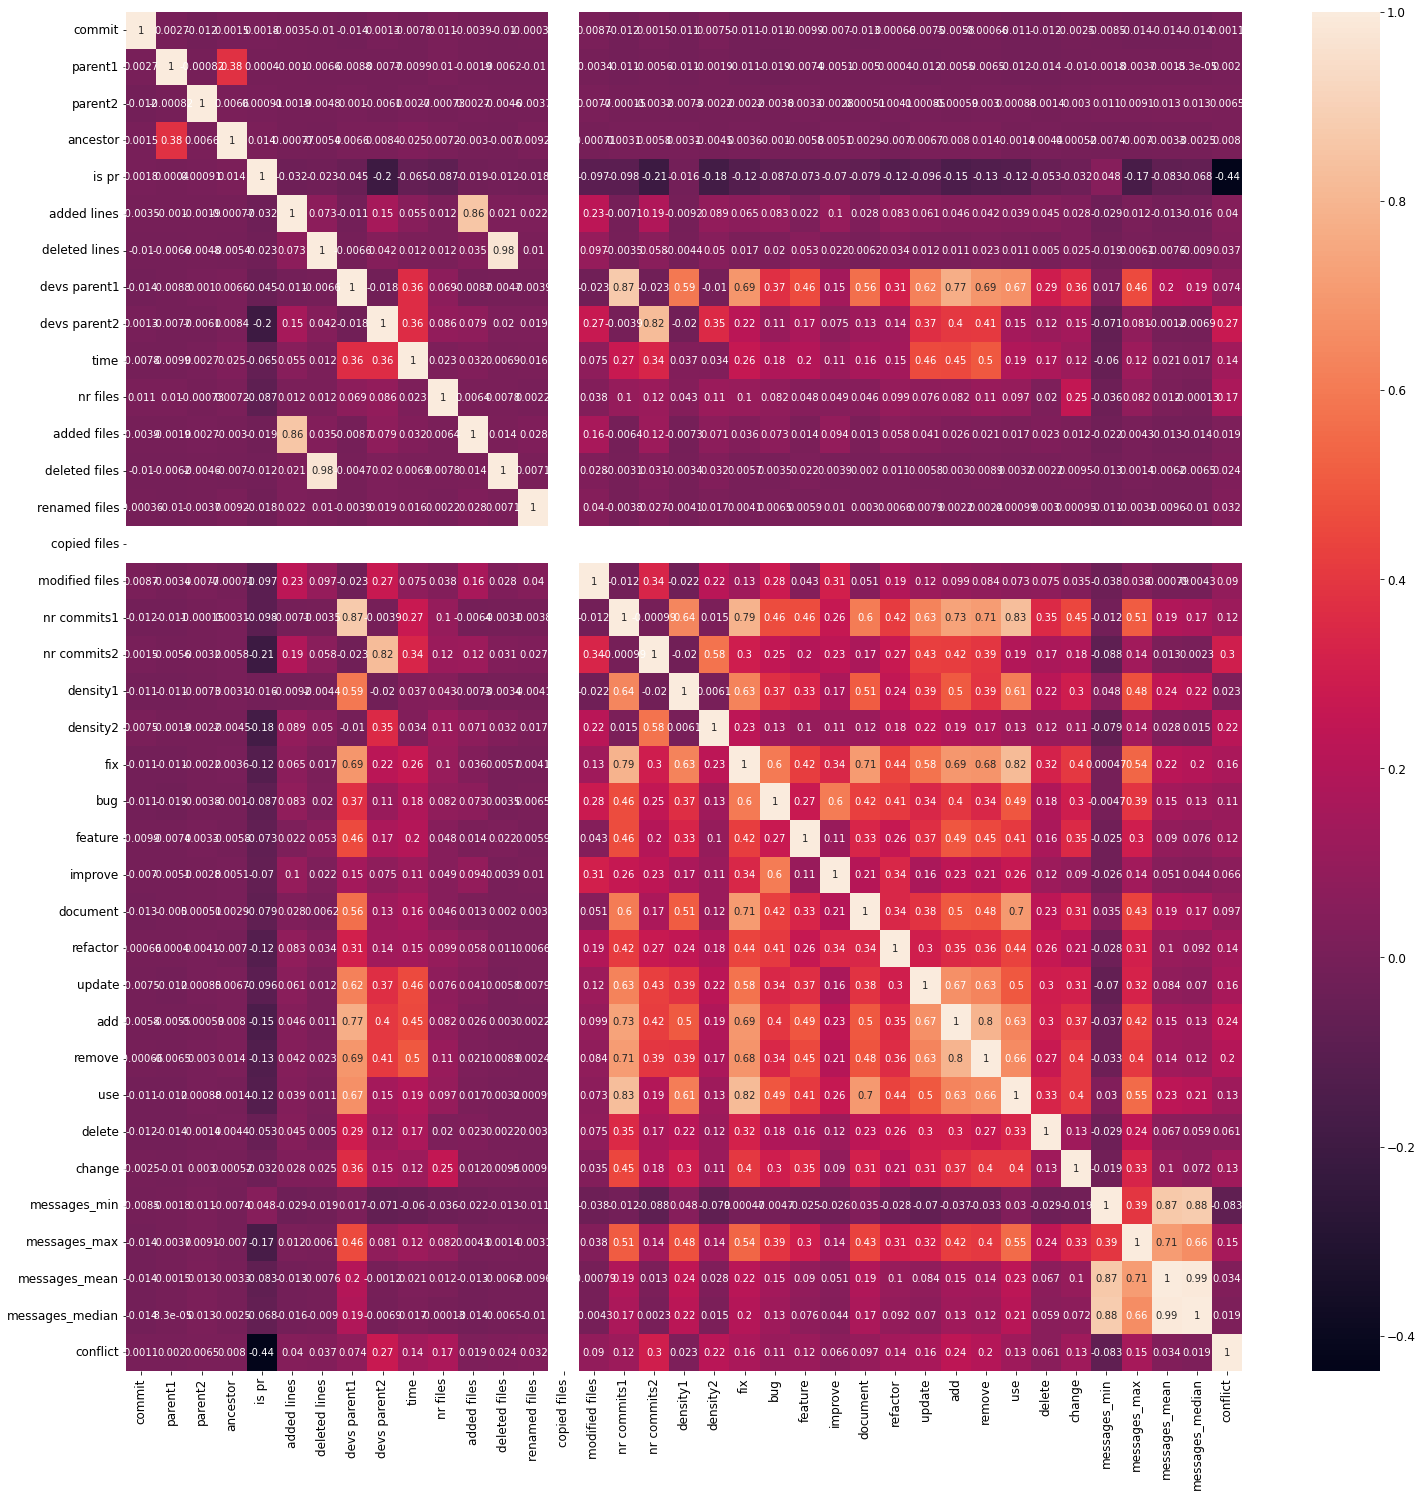

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True)

In [14]:
# impartirea tabelului
#[:,:-1] 1 to n-1 columns
#[:,-1] last column -> conflic column
columns_rest  = data.iloc[:,:-1].values 
conflict_column = data.iloc[:,-1].values
print(columns_rest)
# CONF
print("conflict column")
print(conflict_column)

[[2.52210000e+04 2.60090000e+04 9.90200000e+03 ... 6.50000000e+01
  3.54000000e+01 2.00000000e+01]
 [4.28700000e+03 1.19770000e+04 2.62980000e+04 ... 1.17000000e+02
  5.85638298e+01 5.35000000e+01]
 [2.43730000e+04 5.70200000e+03 1.96150000e+04 ... 1.80000000e+01
  1.80000000e+01 1.80000000e+01]
 ...
 [1.71750000e+04 8.84500000e+03 2.31990000e+04 ... 5.80000000e+01
  3.30000000e+01 3.30000000e+01]
 [2.34030000e+04 8.84500000e+03 2.41180000e+04 ... 8.00000000e+00
  8.00000000e+00 8.00000000e+00]
 [9.00200000e+03 6.82700000e+03 1.84540000e+04 ... 2.30000000e+01
  2.30000000e+01 2.30000000e+01]]
conflict column
[0 1 0 ... 0 0 0]


In [15]:
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25221,26009,9902,18220,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4287,11977,26298,11674,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24373,5702,19615,3955,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1272,6900,14041,18408,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7015,12524,9848,2603,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,20783,9786,22545,6839,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,14880,16800,7497,17034,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,17175,8845,23199,6136,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,23403,8845,24118,6136,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [30]:
#train_test_split splits arrays or matrices into random train and test subsets. That means that
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior. 

#tr -> for train
#ts -> for tests

x_tr,x_ts, y_tr, y_ts = train_test_split (columns_rest, conflict_column, test_size=0.3, random_state=42)



print("Transfrom -> X")
print(x_tr)
print("Test -> X")
print(x_ts)

print("Transfrom -> Y")
print(y_tr)
print("Test -> Y")
print(y_ts)
print(x_tr.shape,x_ts.shape,y_tr.shape,y_ts.shape)



Transfrom -> X
[[ 2504.          7451.          6889.         ...    75.
     63.75          67.        ]
 [ 9021.          2028.          7287.         ...    91.
     73.66666667    65.        ]
 [16789.         13585.         10292.         ...   350.
    147.01587302   137.        ]
 ...
 [22497.         10313.         16770.         ...    69.
     46.8           43.        ]
 [ 9848.          1785.          5546.         ...    93.
     93.            93.        ]
 [ 6246.         21645.          1727.         ...   163.
     97.89285714    97.        ]]
Test -> X
[[14909.         21459.         25941.         ...   106.
     64.            57.5       ]
 [ 8295.         24188.         10091.         ...    39.
     39.            39.        ]
 [21576.          3747.          5304.         ...    58.
     58.            58.        ]
 ...
 [ 9250.          2874.         17446.         ...   403.
     66.50753769    61.        ]
 [18614.         13999.          1153.         ...   1

In [31]:
print(x_tr, x_ts)

[[ 2504.          7451.          6889.         ...    75.
     63.75          67.        ]
 [ 9021.          2028.          7287.         ...    91.
     73.66666667    65.        ]
 [16789.         13585.         10292.         ...   350.
    147.01587302   137.        ]
 ...
 [22497.         10313.         16770.         ...    69.
     46.8           43.        ]
 [ 9848.          1785.          5546.         ...    93.
     93.            93.        ]
 [ 6246.         21645.          1727.         ...   163.
     97.89285714    97.        ]] [[14909.         21459.         25941.         ...   106.
     64.            57.5       ]
 [ 8295.         24188.         10091.         ...    39.
     39.            39.        ]
 [21576.          3747.          5304.         ...    58.
     58.            58.        ]
 ...
 [ 9250.          2874.         17446.         ...   403.
     66.50753769    61.        ]
 [18614.         13999.          1153.         ...   132.
    105.75         10

In [32]:
#is used to resize the distribution of values
#so that the mean of the observed values is 0 and the standard deviation is 1.
standardScaler = StandardScaler()

# Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
# Transform(): Method using these calculated parameters apply the transformation to a particular dataset.
# fit_transform(): joins the fit() and transform() method for transformation of dataset.

scaledX_tr = standardScaler.fit_transform(x_tr)
scaledX_ts= standardScaler.transform(x_ts)

In [33]:
print(scaledX_tr)
print(scaledX_ts)

[[-1.39948768 -0.76269441 -0.84198304 ... -0.32814962 -0.13797804
  -0.01766152]
 [-0.56413174 -1.47084987 -0.7904107  ... -0.14798816  0.11848666
  -0.07022246]
 [ 0.4315787   0.03830608 -0.40102655 ...  2.76837552  2.01544282
   1.82197149]
 ...
 [ 1.16323617 -0.38896382  0.43838459 ... -0.39571017 -0.57633871
  -0.64839283]
 [-0.45812601 -1.50258172 -1.0160073  ... -0.12546797  0.61848506
   0.66563074]
 [-0.91983417  1.0908108  -1.51086855 ...  0.66273843  0.74502406
   0.77075263]]
[[ 0.19059832  1.06652223  1.62675131 ...  0.02091322 -0.13151254
  -0.267326  ]
 [-0.65719119  1.42288518 -0.42707188 ... -0.73351291 -0.7780622
  -0.75351472]
 [ 1.04518142 -1.24637647 -1.04736536 ... -0.51957117 -0.28668446
  -0.25418576]
 ...
 [-0.53477828 -1.36037605  0.52597983 ...  3.36516037 -0.06666264
  -0.17534435]
 [ 0.66550913  0.09236774 -1.58524675 ...  0.31367559  0.94822538
   1.02041711]
 [-0.89009617  1.35315348 -1.27879301 ... -0.06916752  0.32107222
   0.36340532]]


[Text(893.4719036697248, 16863.954545454544, 'X[16] <= -0.331\nentropy = 0.307\nsamples = 18891\nvalue = [17851, 1040]'),
 Text(887.0728211009175, 15257.863636363636, 'entropy = 0.0\nsamples = 7179\nvalue = [7179, 0]'),
 Text(899.8709862385322, 15257.863636363636, 'X[32] <= -0.141\nentropy = 0.432\nsamples = 11712\nvalue = [10672, 1040]'),
 Text(526.5245126146789, 13651.772727272728, 'X[27] <= 0.323\nentropy = 0.661\nsamples = 4483\nvalue = [3715, 768]'),
 Text(245.56479357798167, 12045.681818181818, 'X[35] <= -0.629\nentropy = 0.518\nsamples = 3280\nvalue = [2899, 381]'),
 Text(97.98595183486239, 10439.59090909091, 'X[10] <= -0.024\nentropy = 0.727\nsamples = 864\nvalue = [689, 175]'),
 Text(25.59633027522936, 8833.5, 'X[25] <= 1.686\nentropy = 0.073\nsamples = 455\nvalue = [451, 4]'),
 Text(12.79816513761468, 7227.409090909092, 'X[0] <= 0.083\nentropy = 0.041\nsamples = 449\nvalue = [447, 2]'),
 Text(6.39908256880734, 5621.318181818182, 'entropy = 0.0\nsamples = 242\nvalue = [242, 0]

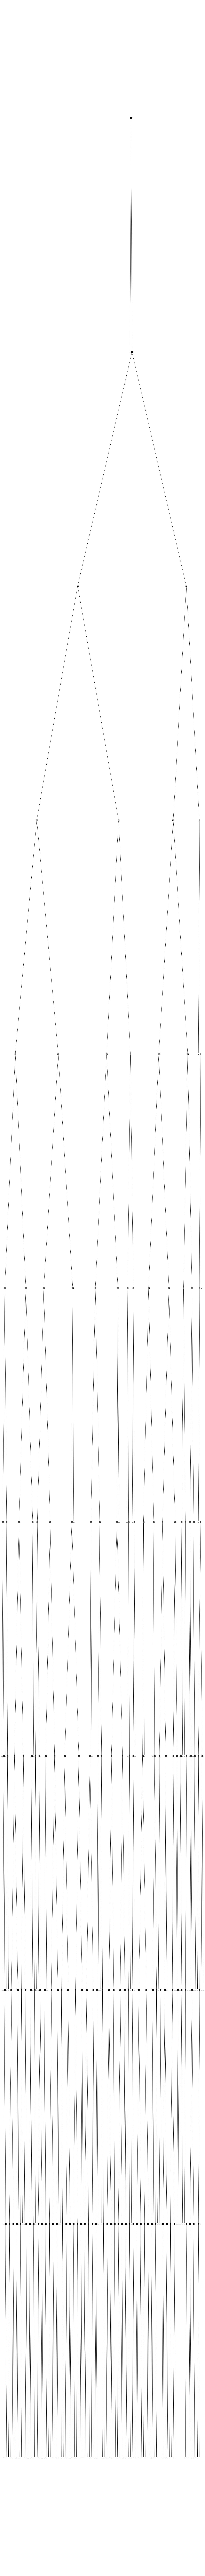

In [59]:
treeClassifier = DecisionTreeClassifier(max_depth = 10, criterion='entropy', max_features='log2')
treeClassifier.fit(scaledX_tr, y_tr)
plt.figure(figsize=(25,325))
tree.plot_tree(treeClassifier)
#The goal of using a Decision Tree is to create a training model that can use to predict the class 
#or value of the target variable by learning simple decision rules inferred from prior data(training data).


In [60]:
treeClassifier.fit(columns_rest,conflict_column)
import graphviz
#dot_data = tree.export_graphviz(clf, out_file = None, feature_names=data_2.columns.get_values(),  
#                         filled=True)
dot_data = tree.export_graphviz(treeClassifier, out_file = None,  
                         filled=True)

graph = graphviz.Source(dot_data)
graph.render("gitpred")

'gitpred.pdf'

In [61]:
#from wand.image import Image as WImage
#img = WImage(filename='gitpred.pdf')
#img

In [62]:
#predict() function enables us to predict the labels of the data values on the basis of the trained model.
prediction = treeClassifier.predict(x_ts)

In [63]:
# check how good is the model 
# check the prediction with original input test
# precision 
m = mean_absolute_error(y_ts, prediction) 
print('abs error is: ' , m,'\n')
print(classification_report(y_ts, prediction),"\n")

abs error is:  0.0317401506730888 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7668
           1       0.81      0.52      0.64       429

    accuracy                           0.97      8097
   macro avg       0.89      0.76      0.81      8097
weighted avg       0.97      0.97      0.97      8097
 



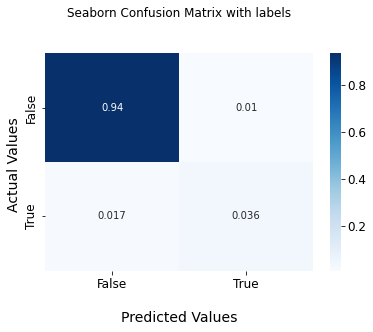

In [57]:
# A confusion matrix is a table that is often used to describe the performance of a classification model 
#(or "classifier") on a set of test data for which the true values are known. 

cf_matrix = confusion_matrix(y_ts, prediction)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
